In [1]:
import lsdb
from lsdb_macauff.macauff_matching import MacauffMatching
from lsdb_macauff.macauff_crossmatch import MacauffCrossmatch

left_cat = lsdb.read_hats("../lsdb_data/gaia_cone")
right_cat = lsdb.read_hats("../lsdb_data/catwise_cone")
macauff_config = MacauffMatching("../test_data/gaia_wise_joint_params.yaml", "../test_data/gaia_params.yaml", "../test_data/wise_params.yaml")
xmatch = left_cat.crossmatch(right_cat, algorithm=MacauffCrossmatch, macauff=macauff_config, suffixes=("_gaia", "_catwise"))
xmatch

/Users/smcmu/code/lsdb/src/lsdb/catalog/catalog.py:256: FutureWarning: The default suffix behavior will change from applying suffixes to all columns to only applying suffixes to overlapping columns in a future release.To maintain the current behavior, explicitly set `suffix_method='all_columns'`. To change to the new behavior, set `suffix_method='overlapping_columns'`.
  warnings.warn(


,source_id_gaia,designation_gaia,ra_gaia,dec_gaia,pos_err_gaia,bp_mag_gaia,g_mag_gaia,r_mag_gaia,bestIndex_gaia,bp_snr_gaia,g_snr_gaia,rp_snr_gaia,pmra_gaia,pmdec_gaia,pm_err_gaia,chunkId_gaia,isOverlap_gaia,cntr_catwise,designation_catwise,ra_catwise,dec_catwise,pos_err_catwise,w1mag_catwise,w2mag_catwise,bestIndex_catwise,w1snr_catwise,w2snr_catwise,chunkId_catwise,isOverlap_catwise,p,eta,xi,a_avg_cont,b_avg_cont,seps
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Order: 3, Pixel: 512",int64[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int64[pyarrow],int64[pyarrow],int64[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],int64[pyarrow],int64[pyarrow],float64,float64,float64,float64,float64,float64


In [2]:
res = xmatch.compute()
res

2025-10-16 14:48:20 Rank 0, chunk 0: Creating empirical perturbation AUFs for catalogue "a"...
2025-10-16 14:48:21 Rank 0, chunk 0: Creating perturbation AUFs sky indices for catalogue "a"...
2025-10-16 14:48:21 Rank 0, chunk 0: Creating empirical perturbation AUF PDFs for catalogue "a"...
2025-10-16 14:48:21 Rank 0, chunk 0: Creating perturbation AUFs filter indices for catalogue "a"...
2025-10-16 14:48:21 Rank 0, chunk 0: Creating empirical perturbation AUFs for catalogue "b"...
2025-10-16 14:48:21 Rank 0, chunk 0: Creating perturbation AUFs sky indices for catalogue "b"...
2025-10-16 14:48:21 Rank 0, chunk 0: Creating empirical perturbation AUF PDFs for catalogue "b"...
2025-10-16 14:48:21 Rank 0, chunk 0: Creating perturbation AUFs filter indices for catalogue "b"...
2025-10-16 14:48:21 Rank 0, chunk 0: Creating catalogue islands and overlaps...
2025-10-16 14:48:22 Rank 0, chunk 0: Calculating maximum overlap...
2025-10-16 14:48:33 Rank 0, chunk 0: Truncating star overlaps by AUF i

,source_id_gaia,designation_gaia,ra_gaia,dec_gaia,pos_err_gaia,bp_mag_gaia,g_mag_gaia,r_mag_gaia,bestIndex_gaia,bp_snr_gaia,g_snr_gaia,rp_snr_gaia,pmra_gaia,pmdec_gaia,pm_err_gaia,chunkId_gaia,isOverlap_gaia,cntr_catwise,designation_catwise,ra_catwise,dec_catwise,pos_err_catwise,w1mag_catwise,w2mag_catwise,bestIndex_catwise,w1snr_catwise,w2snr_catwise,chunkId_catwise,isOverlap_catwise,p,eta,xi,a_avg_cont,b_avg_cont,seps
_healpix_29,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2306257182472984125,4612514367296580224,Gaia DR3 4612514367296580224,72.597869,-86.797002,0.000042,17.3707,16.8794,16.232,2,144.39076,1307.3811,280.33557,-0.000282,0.000611,0.000055,0,0,356928489,J045023.54-864749.1,72.598103,-86.796998,0.037827,14.862,14.936,0,68.699997,57.900002,0,0,0.999998,1.712521,4.054503,0.0,0.0,0.048869
2306257203693513648,4612514401656315904,Gaia DR3 4612514401656315904,72.67584,-86.781434,0.00001,10.5037,9.7688,8.9416,2,1674.9479,5391.4189,4321.9434,-0.001687,0.0212,0.000013,0,0,356929313,J045042.21-864653.1,72.675864,-86.781429,0.022173,7.226,7.027,1,58.700001,103.4,0,0,1.000000,3.007561,4.750412,0.0,0.0,0.019939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2306306355459369026,4612612704868678784,Gaia DR3 4612612704868678784,55.126175,-87.077651,0.001348,18.0049,17.046,15.2413,1,73.022163,52.118095,390.27515,<NA>,<NA>,<NA>,0,0,259638220,J034030.34-870439.6,55.126437,-87.077687,0.040021,12.513,12.381,0,49.599998,65.300003,0,0,0.998519,1.009548,1.819262,0.0,0.0,0.136925
2306343375641333207,4612686750105095552,Gaia DR3 4612686750105095552,67.637701,-86.670704,0.001103,16.0189,15.9112,14.5054,1,309.30374,97.522934,485.71158,<NA>,<NA>,<NA>,0,0,259479466,J043033.10-864014.4,67.637928,-86.670679,0.023564,12.651,12.698,0,85.699997,108.6,0,0,0.994918,1.684698,0.718530,0.0,0.0,0.102499


In [4]:
import matplotlib.pyplot as plt

(array([  19.,   24.,   25.,   29.,   29.,   55.,   52.,   93.,  192.,
        7313.]),
 array([0.50191124, 0.55172011, 0.60152899, 0.65133786, 0.70114674,
        0.75095561, 0.80076449, 0.85057336, 0.90038224, 0.95019111,
        0.99999999]),
 <BarContainer object of 10 artists>)

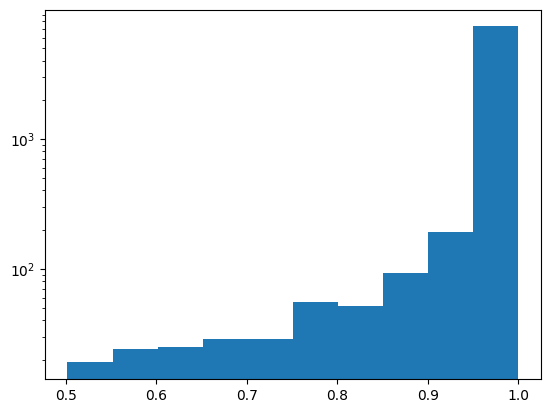

In [7]:
plt.hist(res["p"], log=True)

In [4]:
left_cat = lsdb.read_hats("../lsdb_data/gaia_cone")
right_cat = lsdb.read_hats("../lsdb_data/catwise_cone")
left_pix = left_cat.get_healpix_pixels()[0]
right_pix = right_cat.get_healpix_pixels()[0]
left_partition = left_cat.get_partition(left_pix.order, left_pix.pixel).compute()
right_partition = right_cat.get_partition(right_pix.order, right_pix.pixel).compute()
algo = MacauffMatching("../test_data/gaia_wise_joint_params.yaml", "../test_data/gaia_params.yaml", "../test_data/wise_params.yaml")
algo(left_partition, right_partition, left_pix, right_pix, left_pix if left_pix.order > right_pix.order else right_pix)

2025-10-15 16:27:07 Rank 0, chunk 0: Creating empirical perturbation AUFs for catalogue "a"...
2025-10-15 16:27:08 Rank 0, chunk 0: Creating perturbation AUFs sky indices for catalogue "a"...
2025-10-15 16:27:08 Rank 0, chunk 0: Creating empirical perturbation AUF PDFs for catalogue "a"...
2025-10-15 16:27:08 Rank 0, chunk 0: Creating perturbation AUFs filter indices for catalogue "a"...
2025-10-15 16:27:08 Rank 0, chunk 0: Creating empirical perturbation AUFs for catalogue "b"...
2025-10-15 16:27:08 Rank 0, chunk 0: Creating perturbation AUFs sky indices for catalogue "b"...
2025-10-15 16:27:08 Rank 0, chunk 0: Creating empirical perturbation AUF PDFs for catalogue "b"...
2025-10-15 16:27:08 Rank 0, chunk 0: Creating perturbation AUFs filter indices for catalogue "b"...
2025-10-15 16:27:08 Rank 0, chunk 0: Creating catalogue islands and overlaps...
2025-10-15 16:27:10 Rank 0, chunk 0: Calculating maximum overlap...
2025-10-15 16:27:24 Rank 0, chunk 0: Truncating star overlaps by AUF i

ValueError: Per-column arrays must each be 1-dimensional

In [6]:
import pandas as pd
pd.DataFrame({
    'p': algo.p,
    'eta': algo.eta,
    'xi': algo.xi,
    'a_avg_cont': algo.a_avg_cont,
    'b_avg_cont': algo.b_avg_cont,
    'acontprob': algo.acontprob,
    'bcontprob': algo.bcontprob,
    'seps': algo.seps
})

ValueError: Per-column arrays must each be 1-dimensional

In [14]:
algo.seps

array([0.0488692 , 0.01993917, 0.31128647, ..., 0.18764219, 0.13692464,
       0.10249941], shape=(7831,))

In [5]:
import pandas as pd
import numpy as np
pd.Series(dtype=np.float64)

Series([], dtype: float64)